## How to Use LyricsGenius

Install latest version of lyricsgenius

In [3]:
!pip install git+https://github.com/johnwmillr/LyricsGenius.git

  Cloning https://github.com/johnwmillr/LyricsGenius.git to /private/var/folders/t1/1xbnlp5j163cd9mt_ht253cw0000gp/T/pip-req-build-igj0z9gn
  Running command git clone --filter=blob:none --quiet https://github.com/johnwmillr/LyricsGenius.git /private/var/folders/t1/1xbnlp5j163cd9mt_ht253cw0000gp/T/pip-req-build-igj0z9gn
  Resolved https://github.com/johnwmillr/LyricsGenius.git to commit bec02665b807941ca95e045be910e861789fc4a7
  Preparing metadata (setup.py) ... done
  Created wheel for lyricsgenius: filename=lyricsgenius-3.0.1-py3-none-any.whl size=44688 sha256=2809e5a0a1fb214b6060e244efd0e5045eacb8be162dcda7b87458cdac567cad
  Stored in directory: /private/var/folders/t1/1xbnlp5j163cd9mt_ht253cw0000gp/T/pip-ephem-wheel-cache-cddg735i/wheels/64/c0/2c/8e83de1c83814299822723e7471f38a2dfbd750de606c7ccbd
Successfully built lyricsgenius

[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [1]:
client_access_token = "YOUR TOKEN HERE"

In [1]:
client_access_token = "0Ybt8RthfwywZmlaaxX3bLwEGIR3mW_PgX6U63cPQxP9q68kDormc-JS2bNRH8Ao"

Import and set up lyricsgenius

In [14]:
from pathlib import Path
import lyricsgenius
genius = lyricsgenius.Genius(client_access_token)

You can decide to remove section headers in lyrics, exclude songs that are remixes, etc. by setting the following variables:

In [ ]:
#genius.verbose = False # Turn off status messages
#genius.remove_section_headers = True # Remove section headers (e.g. [Chorus]) from lyrics when searching
#genius.skip_non_songs = False # Include hits thought to be non-songs (e.g. track lists)
#genius.excluded_terms = ["(Remix)", "(Live)"] # Exclude songs with these words in their title

You can search for an album and save the lyrics to a single text file. You can examine the code for the `save_lyrics()` function [here](https://github.com/johnwmillr/LyricsGenius/blob/master/lyricsgenius/types/album.py#L55).

In [5]:
album = genius.search_album("Under Construction", "Missy Elliott")
album.save_lyrics(extension='txt')

Searching for "Under Construction" by Missy Elliott...
Wrote Lyrics_UnderConstruction.txt.


This `album` now has a number of properties that we can access, such as the artist's name, the album name, and the album cover art

In [6]:
album.artist.name

'Missy Elliott'

In [7]:
album.name

'Under Construction'

In [8]:
album.cover_art_url

'https://images.genius.com/5dfa9016abf58bcec676c0b77a31f2bc.1000x1000x1.jpg'

In [9]:
album.release_date_components

datetime.datetime(2002, 11, 12, 0, 0)

In [10]:
album.release_date_components.year

2002

The `album` also has information about each track or song, which we can access like so:

In [11]:
for track in album.tracks:
    print(track.song.title)

Intro / Go To The Floor
Bring the Pain
Gossip Folks
Work It
Back in the Day
Funky Fresh Dressed
Pussycat
Nothing Out There for Me
Slide
Play That Beat
Ain’t That Funny
Hot
Can You Hear Me
Work It (Remix)
Drop the Bomb
Can You Hear Me [Edit]


In [12]:
for track in album.tracks:
    print(track.song.lyrics)

5 ContributorsIntro / Go To The Floor Lyrics[Part I: Intro]

[Spoken]
Yeah, what's the deal, y'all? This Missy Elliott
Givin' y'all magazine writers, radio cats, listeners or plain ol' haters
A small piece of, of my album which is titled Under Construction
Under Construction simply states that I'm a work in progress
I'm workin' on myself, you know
Uh, ever since Aaliyah passed, I view life in a more valuable way
Lookin' at hate and anger, and gossip, or just plain old bullshit became ignorant to me
When you realize in a blink of an eye, you walkin' down a church isle
And that was meant for weddings and happiness but realizing those same church isles are used to
To view a loved one for the last time
From the World Trade families to the Left Eye family
Big Pun family, you know, Biggie family, 'Pac family
To the hip-hop family, we all under construction, tryna rebuild, you know, ourselves
Hip-hop done gained respect from, you know, not even respect from, but just, like, rock and roll
And 

Make a new directory and save individual songs and lyrics

In [15]:
artist_title = album.artist.name
album_title = album.name
           
#A line of code that we need to create a directory
Path(f"{artist_title}_{album_title}").mkdir(parents=True, exist_ok=True)
 
for track in album.tracks:
    song_title = track.song.title
    song_title = song_title.replace('/', '-') 
    
    custom_filename= f"{artist_title}_{album_title}/{song_title}"
    
    # Save each song lyric file as a text file with
    # a custom filename 
    track.song.save_lyrics(extension='txt',
                           filename=custom_filename,
                           sanitize=False)

Wrote Missy Elliott_Under Construction/Intro - Go To The Floor.txt.
Wrote Missy Elliott_Under Construction/Bring the Pain.txt.
Wrote Missy Elliott_Under Construction/Gossip Folks.txt.
Wrote Missy Elliott_Under Construction/Work It.txt.
Wrote Missy Elliott_Under Construction/Back in the Day.txt.
Wrote Missy Elliott_Under Construction/Funky Fresh Dressed.txt.
Wrote Missy Elliott_Under Construction/Pussycat.txt.
Wrote Missy Elliott_Under Construction/Nothing Out There for Me.txt.
Wrote Missy Elliott_Under Construction/Slide.txt.
Wrote Missy Elliott_Under Construction/Play That Beat.txt.
Wrote Missy Elliott_Under Construction/Ain’t That Funny.txt.
Wrote Missy Elliott_Under Construction/Hot.txt.
Wrote Missy Elliott_Under Construction/Can You Hear Me.txt.
Wrote Missy Elliott_Under Construction/Work It (Remix).txt.
Wrote Missy Elliott_Under Construction/Drop the Bomb.txt.
Wrote Missy Elliott_Under Construction/Can You Hear Me [Edit].txt.


## Counting Word Frequency

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer  
import glob

Read in a list of files from a folder/directory

In [17]:
directory_path = "Missy Elliott_Under Construction"

text_files = glob.glob(f"{directory_path}/*.txt")
text_titles = [Path(text).stem for text in text_files]

Count words with scikitlearn

In [18]:
#Initialize CountVectorizer with desired parameters
count_vectorizer= CountVectorizer(input='filename',
                                  stop_words= None)

#Plug in "text_files" to the initialized count_vectorizer
word_count_vector = count_vectorizer.fit_transform(text_files)

#Make a DataFrame out of the word count vector and sort by title
word_count_df = pd.DataFrame(word_count_vector.toarray(), index=text_titles, columns=count_vectorizer.get_feature_names())
word_count_df = word_count_df.sort_index()

In [19]:
word_count_df

,11,113,13,17,18,19,1embed,22,29,2embed,...,you,youembed,young,your,yours,yourself,yssim,yum,zebras,zee
Ain’t That Funny,0,0,0,0,0,0,0,0,0,0,...,29,0,0,6,0,0,0,0,0,0
Back in the Day,0,0,0,0,0,1,1,0,1,0,...,6,0,1,6,0,0,0,0,0,0
Bring the Pain,1,0,0,0,0,0,1,0,0,0,...,28,0,0,11,0,0,0,0,0,0
Can You Hear Me,0,0,0,1,0,0,0,1,0,0,...,25,0,0,4,0,1,0,0,0,0
Can You Hear Me [Edit],0,0,0,0,0,0,0,0,0,0,...,37,0,0,7,0,1,0,0,0,0
Drop the Bomb,0,0,0,0,0,0,0,0,0,0,...,20,0,1,4,0,0,0,2,0,0
Funky Fresh Dressed,0,0,0,0,1,0,0,0,0,0,...,17,0,2,5,0,0,0,0,0,0
Gossip Folks,0,0,0,0,0,0,0,0,0,0,...,14,0,0,3,1,0,0,0,1,3
Hot,0,0,0,0,0,0,0,0,0,0,...,44,1,0,9,0,0,0,0,0,0
Intro - Go To The Floor,0,0,0,0,0,0,0,0,0,0,...,29,0,0,3,0,0,0,0,0,0


<AxesSubplot:>

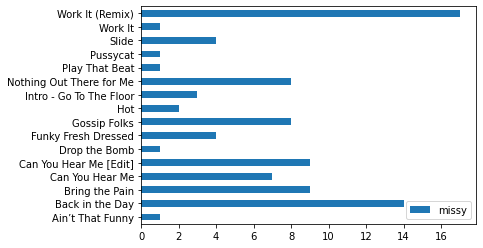

In [25]:
word_count_df.plot(y='missy', kind='barh')

# Your Turn!

Pick an artist or artists, and download lyrics for their songs or albums. Bonus: Do your own word frequency analysis!

In [ ]:
#Your code here







